<img alt="Insight logo" src="https://drive.google.com/uc?export=download&id=1ZRN1ZicgeApX5qYnhRKnxf_VQO0rV7ic" align="left" hspace="10px" vspace="10px" width=100% height=100% >

<p style="font-size:20px; font-family: Trebuchet MS; font-style:italic;"> This dataset contains information about airplane crashes around the world. The data spans <span style="color:#122ecc;"> September 1908 to August 2008</span>. A variety of entities broadcast data about the air crashes, including<span style="color:#122ecc;"> country, continent, operator, fatality, aircraft type and reason for the accident</span>. This dataset currently contains <span style="color:red;">5268 records</span> of air crashes.</p>
 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Tenerife-airport-disaster-crash-animation.gif/1600px-Tenerife-airport-disaster-crash-animation.gif?20170329154038" />


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/favpng_fountain-pen-book-ballpoint-pen.png" align="left" hspace="10px" vspace="5px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:  red">Notebook highlights    </li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>The aim of this notebook is to present a proper approach to the questioning of datasets while maintaining the main objective of extracting various interesting facts through EDA.</li>
    <li>This notebook uses <span style="color:#122ecc;">Geopandas, Folium, Pandas, Numpy, Matplot and some other libraries </span> to plot data points.</li>  
</ul>
</div>

<img alt="Insight logo" src="https://github.com/warazkhan/Data-Analysis-Project/blob/main/Flow%20Of%20Exploratory%20Data%20Analysis%20(EDA).gif?raw=true" align="center" hspace="10px" vspace="10px" width=60% height=100% >

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/favpng_question-mark-sign-symbol.png" align="left" hspace="25px" vspace="5px" width="40" height="50" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Basic Questions</li>
</ul>

<div class="alert alert-danger" role="alert">
<ul style="list-style-type:circle;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>How<span style="color:#122ecc;"> many air crashes</span> occur in the world on <span style="color:#122ecc;">average each year</span>?</li>
    <li>What are the <span style="color:#122ecc;">most affected hours </span>for air crashes around the world?</li>
    <li>Which are the <span style="color:#122ecc;">most affected air operators </span>for air crashes around the world?</li>
    <li>Which<span style="color:#122ecc;"> year</span> had the <span style="color:#122ecc;">most air crashes</span> in the world?</li>
        <li>Which <span style="color:#122ecc;">country</span> has reported the<span style="color:#122ecc;"> most air crashes</span> between 1908 and 2009? ?</li>
    <li>Which <span style="color:#122ecc;">country</span> has reported the<span style="color:#122ecc;"> most fatilities</span> due to air crashes between 1908 and 2009? ?</li>
    <li>Which <span style="color:#122ecc;">continent</span> has reported the<span style="color:#122ecc;"> most air crashes</span> between 1908 and 2009? ?</li>
    <li>Which <span style="color:#122ecc;">continent</span> has reported the<span style="color:#122ecc;"> most fatilities</span> due to air crashes between 1908 and 2009? ?</li>
    <li>How much are the <span style="color:#122ecc;">survival</span> and <span style="color:#122ecc;">fatality chances </span>in air crashes?</li>


</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/DataAnalysislogo.png" align="left" hspace="25px" vspace="5px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Data Analysis</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> Downloading, cleaning, and preparing the Dataset</li> 
</ul>

In [1]:
# Install all the required libraries
!pip install opendatasets geopy pycountry geopandas opendatasets folium mapclassify --upgrade --quiet

In [2]:
# Import all the required libraries
import numpy as np
import pandas as pd
import opendatasets as od
import os
import math
import seaborn as sns
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import ConnectionPatch
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mapclassify
import requests
import geopy
import geopandas
import pycountry
import re
import folium
from sklearn.impute import SimpleImputer
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
# # Download the dataset from kaggle
# dataset_url = 'https://www.kaggle.com/datasets/thedevastator/airplane-crashes-and-fatalities?select=Airplane_Crashes_and_Fatalities_Since_1908.csv' 
# od.download(dataset_url)
#data_dir = './airplane-crashes-and-fatalities'
#os.listdir(data_dir)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airplane-crashes-and-fatalities/Airplane_Crashes_and_Fatalities_Since_1908.csv


In [4]:
# read & load the dataset into pandas dataframe
#crashesDataframe = pd.read_csv('./airplane-crashes-and-fatalities/Airplane_Crashes_and_Fatalities_Since_1908.csv')
crashesDataframe = pd.read_csv('../input/airplane-crashes-and-fatalities/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [5]:
# check the no. of columns & rows
print('The Airplane Crash Dataset contains {:,d} rows & {} columns'.format(crashesDataframe.shape[0], crashesDataframe.shape[1]))

The Airplane Crash Dataset contains 5,268 rows & 14 columns


In [6]:
# convert Date into Datetime Feature
crashesDataframe.Date = pd.to_datetime(crashesDataframe.Date)

In [7]:
crashesDataframe

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [8]:
crashesDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         5268 non-null   int64         
 1   Date          5268 non-null   datetime64[ns]
 2   Time          3049 non-null   object        
 3   Location      5248 non-null   object        
 4   Operator      5250 non-null   object        
 5   Flight #      1069 non-null   object        
 6   Route         3562 non-null   object        
 7   Type          5241 non-null   object        
 8   Registration  4933 non-null   object        
 9   cn/In         4040 non-null   object        
 10  Aboard        5246 non-null   float64       
 11  Fatalities    5256 non-null   float64       
 12  Ground        5246 non-null   float64       
 13  Summary       4878 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 576.3+ KB


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/statics.png" align="left" hspace="70px" vspace="5px" width="90" height="90" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">&emsp;Analyses by Statics</li>
</ul>

In [9]:
ImputedValuesCrashesDataframe = crashesDataframe.copy()
numericData = ImputedValuesCrashesDataframe.select_dtypes(include=np.number).columns.tolist()
missingCounts = crashesDataframe[numericData].isna().sum().sort_values(ascending=False)
missingCounts[missingCounts > 0]

Aboard        22
Ground        22
Fatalities    12
dtype: int64

In [10]:
#Create the imputer
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(ImputedValuesCrashesDataframe[numericData])
ImputedValuesCrashesDataframe[numericData] = imputer.transform(ImputedValuesCrashesDataframe[numericData])

In [11]:
staticalAnalysisCrashesDataframe = ImputedValuesCrashesDataframe[numericData].copy()
del staticalAnalysisCrashesDataframe['index']

In [12]:
staticalAnalysisCrashesDataframe.describe().style.background_gradient(cmap='icefire')

,Aboard,Fatalities,Ground
count,5268.000000,5268.000000,5268.000000
mean,27.554518,20.068303,1.608845
std,42.986652,33.162110,53.874957
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


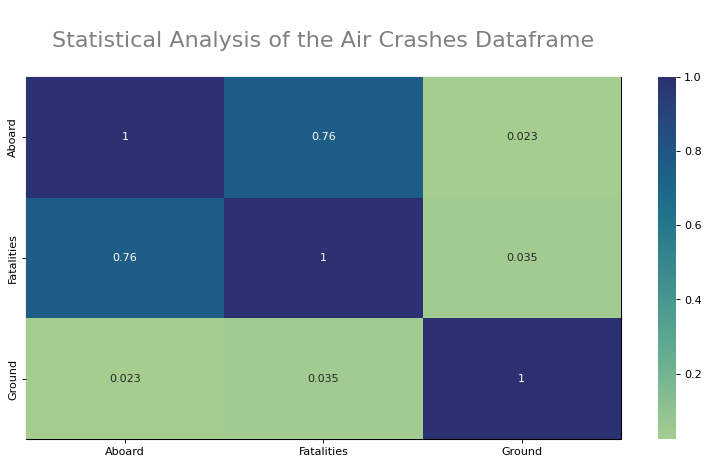

In [13]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
sns.heatmap(staticalAnalysisCrashesDataframe.corr(), annot=True, cmap='crest');

plt.title('\nStatistical Analysis of the Air Crashes Dataframe\n', size=20, color='grey')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/countries-logo.png" align="left" hspace="50px" vspace="5px" width="70" height="80" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">&emsp;Analyses by Country</li>
</ul>

In [14]:
#Countries API
response = requests.get("https://restcountries.com/v3.1/all") 

#response.status_code
#print (response.text)
data = list(response.json())
#countryDict =json.dumps(data)
#countryDict = json.loads(data)
#type(data)

rawcountrydf= pd.DataFrame(data)
countrylist=rawcountrydf['name'].tolist()
continentlist=rawcountrydf['continents'].tolist()


continentList=[]

for name in continentlist:
      for item in name:
            continentList.append(item)

officialCountryNameList=[]
commonCountryNameList=[]

for name in countrylist:
        key=list(name.keys())
        value = list(name.values())
        if key[0]=='common':
            commonCountryNameList.append(value[0])
        if key[1]=='official':
            officialCountryNameList.append(value[1])


RemoveNANValuesDataFrame = ImputedValuesCrashesDataframe.copy()

# Remove NaN values of Operator from Air Crashes dataframe 
RemoveNANValues= RemoveNANValuesDataFrame['Location'].notna()
checkLocationDataFrame = RemoveNANValuesDataFrame[RemoveNANValues]

checkLocationDataFrame['Year'] = pd.DatetimeIndex(checkLocationDataFrame['Date']).year
RemoveNANValuesYear= checkLocationDataFrame['Year'].notna()
checkLocationDataFrame = checkLocationDataFrame[RemoveNANValuesYear]

RemoveNANValuesFatalities= checkLocationDataFrame['Fatalities'].notna()
checkLocationDataFrame = checkLocationDataFrame[RemoveNANValuesFatalities]

RemoveNANValuesTime= checkLocationDataFrame['Time'].notna()
checkLocationDataFrame = checkLocationDataFrame[RemoveNANValuesTime]

RemoveNANValuesTime= checkLocationDataFrame['Operator'].notna()
checkLocationDataFrame = checkLocationDataFrame[RemoveNANValuesTime]

crashesTime = checkLocationDataFrame['Time'].tolist()
crashesLocation = checkLocationDataFrame['Location'].tolist()
crashesYear = checkLocationDataFrame['Year'].tolist()
crashesFatalities = checkLocationDataFrame['Fatalities'].tolist()
crashesOperator = checkLocationDataFrame['Operator'].tolist()

years=[]
countries=[]
fatalities=[]
continents=[]
time=[]
operator=[]


for i in range(len(crashesLocation)):     
    checkcountry = str(crashesLocation[i])
    Years= int(crashesYear[i])
    Fatalities= float(crashesFatalities[i])
    Time= str(crashesTime[i])
    Operator= str(crashesOperator[i])
    
    for j in range (len(officialCountryNameList)):
        checkofficial = re.findall( officialCountryNameList[j], checkcountry )
        checkcommon = re.findall( commonCountryNameList[j], checkcountry )

        if (checkofficial != []):
            countries.append(commonCountryNameList[j])
            years.append(Years)
            continents.append(continentList[j])
            fatalities.append(Fatalities)
            time.append(Time)
            operator.append(Operator)
            
        elif (checkcommon != []):
            countries.append(commonCountryNameList[j])
            years.append(Years)
            fatalities.append(Fatalities)
            continents.append(continentList[j])
            time.append(Time)
            operator.append(Operator)
         
countrydf= pd.DataFrame()

countrydf['Years'] = years
countrydf['Countries'] = countries
countrydf['Fatalities'] = fatalities
countrydf['Continents'] = continents
countrydf['Time'] = time
countrydf['Operator'] = operator

countrydf['Years'] = countrydf['Years'].astype(str)
countryDataframeYears = countrydf.groupby('Countries', sort=False).agg( ','.join)

countrydf['Time'] = countrydf['Time'].astype(str)
countryDataframeYears = countrydf.groupby('Countries', sort=False).agg( ','.join)

countrydf['Operator'] = countrydf['Operator'].astype(str)
countryDataframeYears = countrydf.groupby('Countries', sort=False).agg( ','.join)

countryDataframefatalities = countrydf.groupby('Countries')[['Fatalities']].sum()
countryDataframe = countrydf.groupby('Countries')[['Countries']].count()

countryDataframe['Fatalities'] = countryDataframefatalities.astype(int)
countryDataframe['Years'] = countryDataframeYears.Years
countryDataframe['Time'] = countryDataframeYears.Time
countryDataframe['Operator'] = countryDataframeYears.Operator

def generateCountryCode(countryColumn):
    countryCodeList=[]
    for country in countryColumn:
        try:
            code = pycountry.countries.get(name=country).alpha_3
            countryCodeList.append(code)
        except:
            countryCodeList.append('None')
    return countryCodeList

countryDataframe['Country_CODE'] = generateCountryCode(countryDataframe.index)


worlddf = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
worlddf.columns = ['pop_est', 'continent', 'name', 'Country_CODE', 'gdp_md_est', 'geometry']
mergeWorlddfOncountryDataframe = pd.merge(worlddf,countryDataframe,on='Country_CODE')

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>

<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>The data set<span style="font-weight: bold; color:#122ecc;"> mergeWorlddfOncountryDataframe</span> provides all data like <span style="font-weight: bold; color:#122ecc;">latitude</span> and <span style="font-weight: bold; color:#122ecc;">logitude</span> of countries needed to plot a <span style="font-weight: bold; color:#122ecc;">world map</span> by using <span style="font-weight: bold; color:#122ecc;"> Geopandas' 'naturalearth_lowres'.</span></li>
    <br>
</ul>
</div>

In [15]:
#CSV file to get the data of logitude and Latitude of countries
location = pd.read_csv('https://raw.githubusercontent.com/warazkhan/Data-Analysis/main/countries-latitude-longitude.csv')
countriesdf = mergeWorlddfOncountryDataframe.merge(location,on='name').sort_values(by='Fatalities',ascending=False).reset_index()

worldMap = folium.Map(tiles="cartodbpositron", zoom_start=10, min_zoom=1.5, max_zoom=10) 

def add_markers_to_the_map(worldMap, gdf, color, icon):  

    for i in range(0,len(countriesdf)):
        name = (countriesdf.name[i]).split(' ')
        continent = (countriesdf.continent[i]).split(' ')
        years = countriesdf.Years[i]
        time = countriesdf.Time[i]
        operator= countriesdf.Operator[i]
        popup_text = "Country:{}({})  Continent:{}  No.ofCrashes:{}  No.ofFacilities:{}  YearsOfCrashes:{}...  TimeOfCrashes:{}... FlightOperator:{}...".format(''.join(name), countriesdf.Country_CODE[i], ''.join(continent), int(countriesdf.Countries[i]), int(countriesdf.Fatalities[i]), years[0:99], time[0:101], operator[0:100])
        popup = folium.Popup(popup_text, autopan='False', parse_html=True,  max_width='100%', lazy ='True')
        marker = folium.Marker(location=[float(countriesdf.latitude[i]),float(countriesdf.longitude[i])], popup=popup, icon = folium.Icon(icon_size=(25, 25), color=color, icon=icon, prefix='fa', draggable= True)).add_to(worldMap)

    return worldMap

folium.TileLayer('Stamen Terrain').add_to(worldMap)
folium.TileLayer('Stamen Toner').add_to(worldMap)
folium.TileLayer('Stamen Water Color').add_to(worldMap)
folium.TileLayer('cartodbpositron').add_to(worldMap)
folium.TileLayer('cartodbdark_matter').add_to(worldMap)
folium.LayerControl().add_to(worldMap)



add_markers_to_the_map(worldMap, countriesdf, color = 'darkred', icon="fa-plane")

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>

<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>1. The <span style="font-weight: bold; color:#122ecc;">map</span> summarizes overall air crash data by <span style="font-weight: bold; color:#122ecc;">countries</span>.</li>
    <br>
    <li>2. The<span style="font-weight: bold; color:#122ecc;"> Pointers </span>on the map will display information about each country where air crashes occurred, such as <span style="font-weight: bold; color:#122ecc;">Country's name</span>, <span style="font-weight: bold; color:#122ecc;">Continent</span>, <span style="font-weight: bold; color:#122ecc;">Year</span>, <span style="font-weight: bold; color:#122ecc;">Time</span>, <span style="font-weight: bold; color:#122ecc;">Air craft</span>, <span style="font-weight: bold; color:#122ecc;">Air Operator</span>, <span style="font-weight: bold; color:#122ecc;">Number of Crashes </span>and <span style="font-weight: bold; color:#122ecc;">Fatalities due to Air Crash</span>.</li>
    <br>
</ul>
</div>

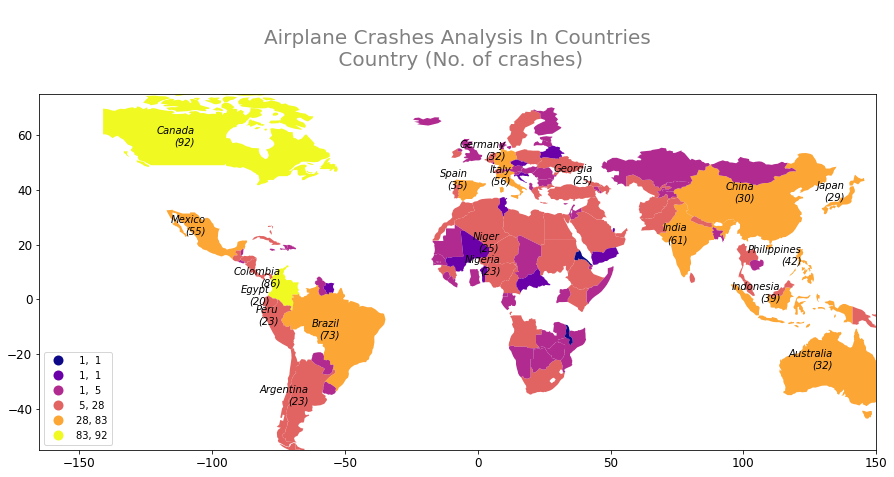

In [16]:
countriescountdf = mergeWorlddfOncountryDataframe.copy()
countriescountdf['Countries'] = countriescountdf['Countries'].astype(str)
countriescountdf['Fatalities'] = countriescountdf['Fatalities'].astype(str)
countriescountdf['Countries_Count'] = countriescountdf[['Countries', 'Fatalities']].agg('.'.join, axis=1)
countriescountdf['Countries_Count'] = countriescountdf['Countries_Count'].astype(float)

location = pd.read_csv('https://raw.githubusercontent.com/warazkhan/Data-Analysis/main/countries-latitude-longitude.csv')
countriesdf = countriescountdf.merge(location,on='name').sort_values(by='Countries_Count',ascending=False).reset_index()
#countriesdf = countriesdf.drop_duplicates(subset='Countries', keep='first', inplace=False, ignore_index=False)

countriesdf.plot(column='Countries_Count', figsize = (15,15), scheme="percentiles", legend=True, cmap='plasma', legend_kwds = {'loc': "lower left", "fmt": "{:.0f}"})

plt.title('\nAirplane Crashes Analysis In Countries\n Country (No. of crashes)\n', size=20, color='grey')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-165, 150)
plt.ylim(-55, 75)

for i in range(0, 19):
    plt.text(float(countriesdf.longitude[i]),float(countriesdf.latitude[i]),"{}\n({})".format(countriesdf.name[i],countriesdf.Countries[i]),size=10, horizontalalignment='right', alpha=1, fontstyle = 'oblique')

plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>

<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>1. <span style="font-weight: bold; color:#122ecc;">Canada </span>has suffered <span style="font-weight: bold; color:#122ecc;">92 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest</span> in the world.</li>
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;"> Colombia </span>has suffered <span style="font-weight: bold; color:#122ecc;">86 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>3. In <span style="font-weight: bold; color:#122ecc;">Slovenia</span>,
        <span style="font-weight: bold; color:#122ecc;">Lebanon</span>,
 <span style="font-weight: bold; color:#122ecc;">Albania</span>,
 <span style="font-weight: bold; color:#122ecc;">Tajikistan</span>,
<span style="font-weight: bold; color:#122ecc;">Belize</span>,
 <span style="font-weight: bold; color:#122ecc;">Botswana</span>,
 <span style="font-weight: bold; color:#122ecc;">Israel</span>,
<span style="font-weight: bold; color:#122ecc;">Ghana</span>,
<span style="font-weight: bold; color:#122ecc;">Kyrgyzstan</span>,
<span style="font-weight: bold; color:#122ecc;">Bangladeshr</span>,
 <span style="font-weight: bold; color:#122ecc;">Croatia</span>,
 <span style="font-weight: bold; color:#122ecc;">Yemen</span>
 <span style="font-weight: bold; color:#122ecc;">Mali</span>,
 <span style="font-weight: bold; color:#122ecc;">Central African Rep.</span>,
 <span style="font-weight: bold; color:#122ecc;">Luxembourg</span>,
 <span style="font-weight: bold; color:#122ecc;">Qatar</span>,
 <span style="font-weight: bold; color:#122ecc;">Czechia</span>,
 <span style="font-weight: bold; color:#122ecc;">Suriname</span>,
 <span style="font-weight: bold; color:#122ecc;">Benin</span>,
 <span style="font-weight: bold; color:#122ecc;">Tunisia</span>,
 <span style="font-weight: bold; color:#122ecc;">Belarus</span>,
 <span style="font-weight: bold; color:#122ecc;">Bulgaria</span>,
 <span style="font-weight: bold; color:#122ecc;">Eritrea</span> and
 <span style="font-weight: bold; color:#122ecc;">Malawi</span>, there have been only <span style="font-weight: bold; color:#122ecc;">one air crash </span> from &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;<span style="font-weight: bold; color:#122ecc;">1908 to 2009</span> .</li>
    <br>
</ul>
</div>

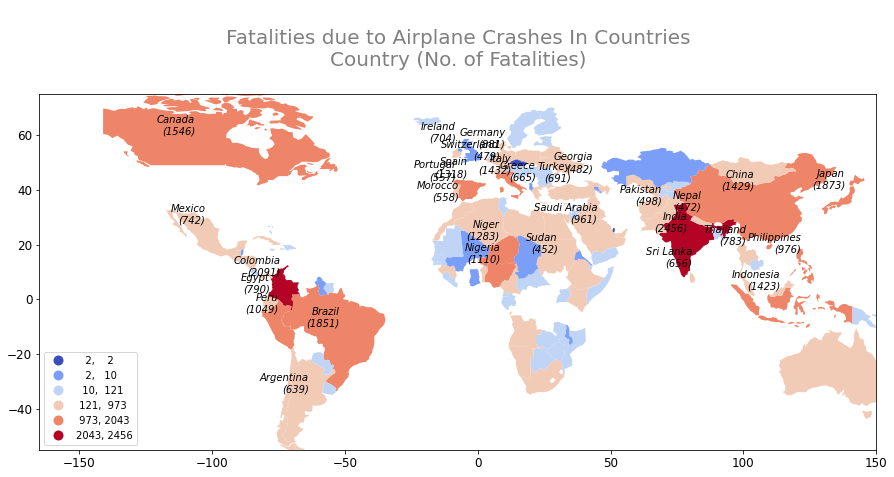

In [17]:
location = pd.read_csv('https://raw.githubusercontent.com/warazkhan/Data-Analysis/main/countries-latitude-longitude.csv')
countriesdf = mergeWorlddfOncountryDataframe.merge(location,on='name').sort_values(by='Fatalities',ascending=False).reset_index()

countriesdf.plot(column='Fatalities', figsize = (15,15), scheme="percentiles", legend=True, cmap='coolwarm', legend_kwds = {'loc': "lower left", "fmt": "{:.0f}"})

plt.title('\nFatalities due to Airplane Crashes In Countries\nCountry (No. of Fatalities)\n', size=20, color='grey')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-165, 150)
plt.ylim(-55, 75)

for i in range(0, 30):
    plt.text(float(countriesdf.longitude[i]),float(countriesdf.latitude[i]),"\n{}\n({})\n".format(countriesdf.name[i],int(countriesdf.Fatalities[i])),size=10, horizontalalignment='right', alpha=1, fontstyle = 'oblique')

plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>

<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>1. <span style="font-weight: bold; color:#122ecc;">India </span>has suffered <span style="font-weight: bold; color:#122ecc;">2456 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">61 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest rate</span> in the world.</li>
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;"> Colombia </span>has suffered <span style="font-weight: bold; color:#122ecc;">2091 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">86 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;"> Czechia</span> and <span style="font-weight: bold; color:#122ecc;">Qatar </span>has the <span style="font-weight: bold; color:#122ecc;">lowest number of fatalities</span> due to air crashes, with <span style="font-weight: bold; color:#122ecc;">two fatalities</span> in a<span style="font-weight: bold; color:#122ecc;"> single crashes </span>.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/continent-logo.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">&emsp;Analyses by Continent</li>
</ul>

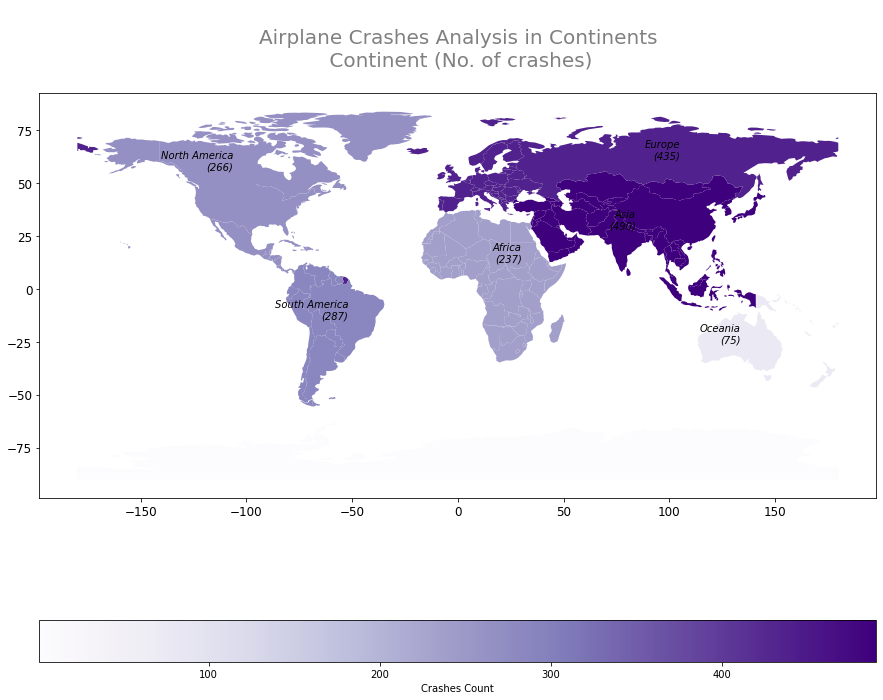

In [18]:
continentDataframefatalities = countrydf.groupby('Continents')[['Fatalities']].sum()
continentDataframe = countrydf.groupby('Continents')[['Continents']].count()

continentDataframe['Fatalities'] = continentDataframefatalities
continentDataframe.index
continentDataframe['continent'] = continentDataframe.index

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
mergeWorlddfOncontinentDataframe = pd.merge(world,continentDataframe,on='continent')

saudiadf= mergeWorlddfOncontinentDataframe.loc[mergeWorlddfOncontinentDataframe['name'] == 'Nepal']
australiadf= mergeWorlddfOncontinentDataframe.loc[mergeWorlddfOncontinentDataframe['name'] == 'Australia']
brazildf= mergeWorlddfOncontinentDataframe.loc[mergeWorlddfOncontinentDataframe['name'] == 'Brazil']
caddf= mergeWorlddfOncontinentDataframe.loc[mergeWorlddfOncontinentDataframe['name'] == 'Sudan']
canadadf= mergeWorlddfOncontinentDataframe.loc[mergeWorlddfOncontinentDataframe['name'] == 'Canada']
russiadf= mergeWorlddfOncontinentDataframe.loc[mergeWorlddfOncontinentDataframe['name'] == 'Russia']
mergeWorlddfOncontinent = pd.concat([saudiadf, australiadf, brazildf, caddf, canadadf, russiadf ], axis=0)

#mergeWorlddfOncontinent = mergeWorlddfOncontinentDataframe.drop_duplicates(subset='continent', keep='first', inplace=False, ignore_index=False)
mergeWorlddfOncontinentDataframe = mergeWorlddfOncontinentDataframe.sort_values(by='Continents',ascending=False).reset_index()

location = pd.read_csv('https://raw.githubusercontent.com/warazkhan/Data-Analysis/main/countries-latitude-longitude.csv')
cotinentdf = mergeWorlddfOncontinent.merge(location,on='name').sort_values(by='Continents',ascending=False).reset_index()


mergeWorlddfOncontinentDataframe.plot(figsize = (15,15), column ='Continents', cmap ='Purples', legend = True, legend_kwds = {'label': "Crashes Count", 'orientation': "horizontal"})
for i in range(0, 6):
     plt.text(float(cotinentdf.longitude[(i)]),float(cotinentdf.latitude[(i)]),"{}\n({})".format(cotinentdf.continent[i],cotinentdf.Continents[i]),size=10, horizontalalignment='right', alpha=1, fontstyle = 'oblique', color ='black')
        
plt.title('\nAirplane Crashes Analysis in Continents\n Continent (No. of crashes)\n', size=20, color='grey')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>

<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>1. <span style="font-weight: bold; color:#122ecc;">Asia </span>has suffered <span style="font-weight: bold; color:#122ecc;">490 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest</span> in the world.</li>
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;"> Europe </span>has suffered <span style="font-weight: bold; color:#122ecc;">435 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>3. In <span style="font-weight: bold; color:#122ecc;">Oceania</span>, there are <span style="font-weight: bold; color:#122ecc;">75 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, the <span style="font-weight: bold; color:#122ecc;">lowest number</span> in the world.</li>
    <br> 
</ul>
</div>

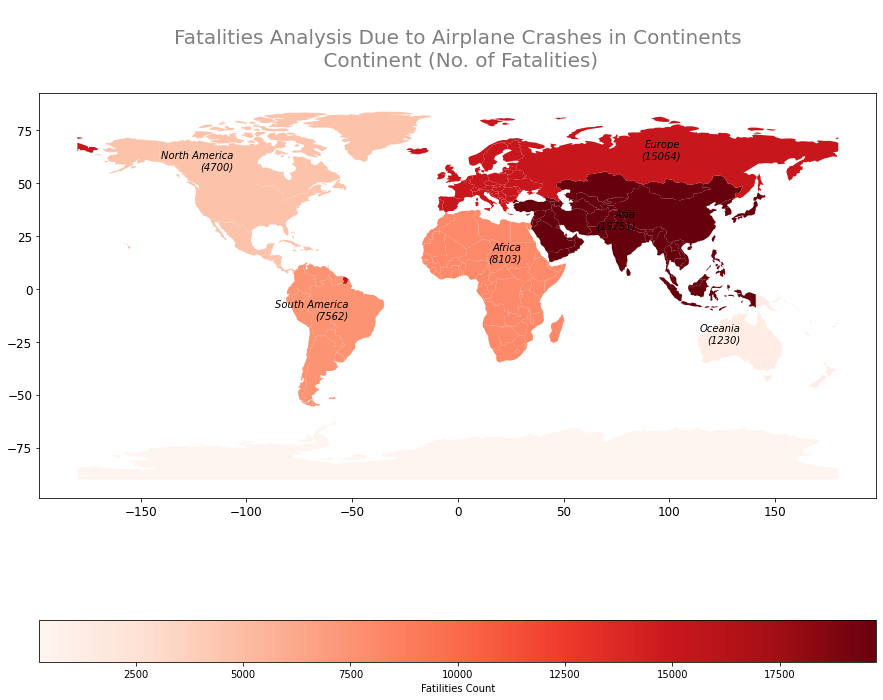

In [19]:
mergeWorlddfOncontinentDataframe = mergeWorlddfOncontinentDataframe.sort_values(by='Fatalities',ascending=False).reset_index()

location = pd.read_csv('https://raw.githubusercontent.com/warazkhan/Data-Analysis/main/countries-latitude-longitude.csv')
cotinentdf = mergeWorlddfOncontinent.merge(location,on='name').sort_values(by='Fatalities',ascending=False).reset_index()


mergeWorlddfOncontinentDataframe.plot(figsize = (15,15), column ='Fatalities', cmap ='Reds', legend = True, legend_kwds = {'label': "Fatilities Count", 'orientation': "horizontal"})
for i in range(0, 6):
     plt.text(float(cotinentdf.longitude[(i)]),float(cotinentdf.latitude[(i)]),"{}\n({})".format(cotinentdf.continent[i],int(cotinentdf.Fatalities[i])),size=10, horizontalalignment='right', alpha=1, fontstyle = 'oblique', color ='black')
plt.title('\nFatalities Analysis Due to Airplane Crashes in Continents\n Continent (No. of Fatalities)\n', size=20, color='grey')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>

<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>1. <span style="font-weight: bold; color:#122ecc;">Asia </span>has suffered <span style="font-weight: bold; color:#122ecc;">19751 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">490 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest rate</span> in the world.</li>
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;"> Europe </span>has suffered <span style="font-weight: bold; color:#122ecc;">15064 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">435 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;"> Oceania </span>has the <span style="font-weight: bold; color:#122ecc;">lowest number of fatalities</span> due to air crashes, with <span style="font-weight: bold; color:#122ecc;">1230 fatalities</span> in<span style="font-weight: bold; color:#122ecc;"> 75 air crashes</span>.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/year-logo.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">&emsp;Analyses by Year</li>
</ul>

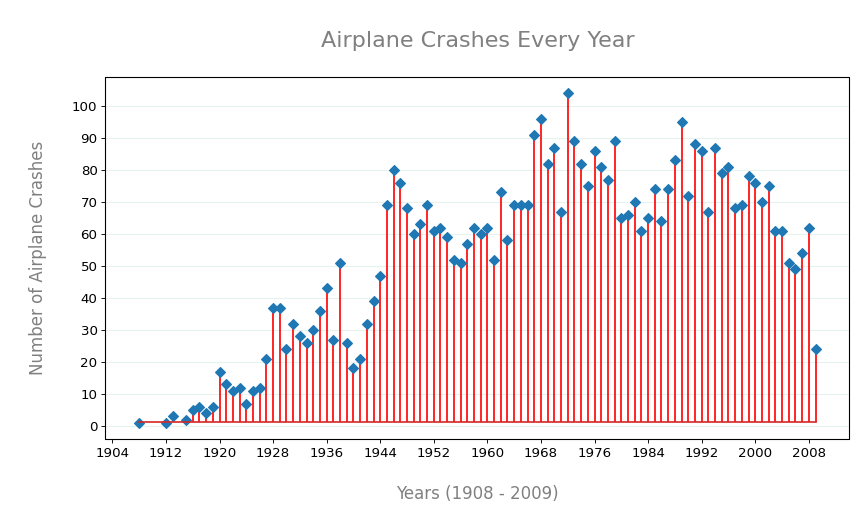

In [20]:
#Number Of crashes Every year
NumberOfCrashesEveryYearDataframe = ImputedValuesCrashesDataframe.copy()
NumberOfCrashesEveryYearDataframe['Year'] = pd.DatetimeIndex(NumberOfCrashesEveryYearDataframe['Date']).year
NumberOfCrashesEveryYear=NumberOfCrashesEveryYearDataframe.groupby('Year')[['index']].count()
crashCount=NumberOfCrashesEveryYear['index'].tolist()
NumberOfCrashesEveryYear['Air_Crash_Count'] = crashCount

fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

plt.stem(NumberOfCrashesEveryYear.index, NumberOfCrashesEveryYear.Air_Crash_Count, linefmt='red', markerfmt='D', bottom=1.1, use_line_collection=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=8.0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10.0))

plt.title('\nAirplane Crashes Every Year\n', size=20, color='grey')
plt.ylabel('\nNumber of Airplane Crashes\n', fontsize=15, color='grey')
plt.xlabel('\nYears (1908 - 2009)\n', fontsize=15, color='grey')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_facecolor((1, 1, 1))
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')

#plt.grid(visible=False, axis='both')
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>1. The <span style="font-weight: bold; color:#122ecc;"> maximum number of air crashes</span> is <span style="font-weight: bold; color:#122ecc;"> 104</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1972</span> between 1908 and 2009.</li>
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;"> 1912 </span>and <span style="font-weight: bold; color:#122ecc;">1908</span> had the  <span style="font-weight: bold; color:#122ecc;">fewest air crashes</span>, only<span style="font-weight: bold; color:#122ecc;"> one </span>between 1908 to 2009.</li>
    <br>
</ul>
</div>

In [21]:
# Average Death Rate Due to Air Crash Every Year
AverageDeathRateDuetoAirCrashEveryYear = NumberOfCrashesEveryYearDataframe.groupby('Year')[['Fatalities']].mean().round(decimals = 1)

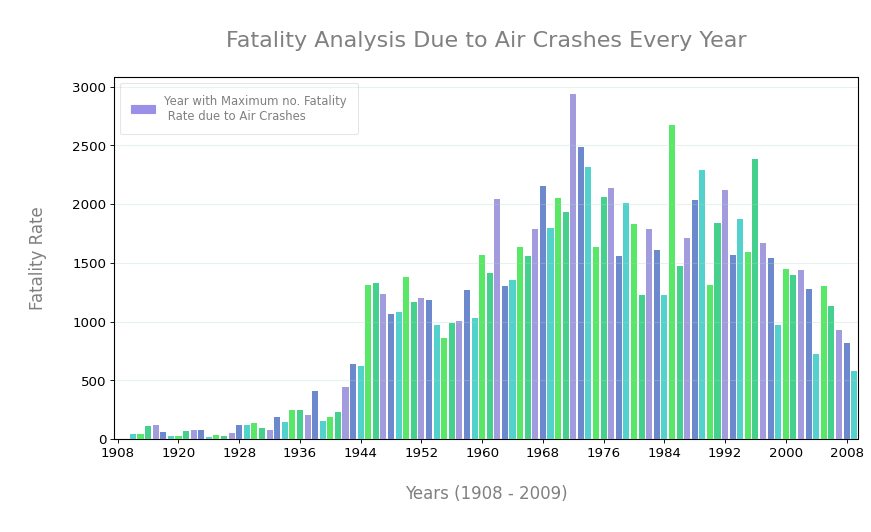

In [22]:
#Death Rate Due to Air Crash Every Year
AverageDeathRateDuetoAirCrashEveryYear = NumberOfCrashesEveryYearDataframe.groupby('Year')[['Fatalities']].sum().round(decimals = 1)

fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax = sns.barplot(y=AverageDeathRateDuetoAirCrashEveryYear['Fatalities'], x=NumberOfCrashesEveryYear.index, palette=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e'])

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=8.0))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=500.0))


plt.title('\nFatality Analysis Due to Air Crashes Every Year\n', size=20, color='grey')
plt.ylabel('\nFatality Rate\n', fontsize=15, color='grey')
plt.xlabel('\nYears (1908 - 2009)\n', fontsize=15, color='grey')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_facecolor((1, 1, 1))
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('1')

#MA = mpatches.Patch(color='#40ff53', label='Year with Minimum no. Fatality\n Rate due to Air Crashes')
MI = mpatches.Patch(color='#9a90e8', label='Year with Maximum no. Fatality\n Rate due to Air Crashes')
ax.legend(handles=[MI], prop={'size': 10.5}, loc='best', edgecolor='black', borderpad=1, framealpha=0.1, labelcolor='grey');

#plt.grid(visible=False, axis='both')
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>1. The <span style="font-weight: bold; color:#122ecc;"> maximum number of fatalities</span> is <span style="font-weight: bold; color:#122ecc;">2937</span> in <span style="font-weight: bold; color:#122ecc;">104 air crashes</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1972</span> between 1908 and 2009.</li>
    <br>
    <li>2. The <span style="font-weight: bold; color:#122ecc;"> minimum number of fatalities</span> is <span style="font-weight: bold; color:#122ecc;">1</span> in a<span style="font-weight: bold; color:#122ecc;">single air crash</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1908</span> between 1908 and 2009.</li>
    <br>
</ul>
</div>

In [23]:
# Average Death Rate In Air Crashes
averageDeathRateDuetoAirCrash=float(math.floor(ImputedValuesCrashesDataframe.Fatalities.mean()))
averageDeathRateDuetoAirCrash

20.0

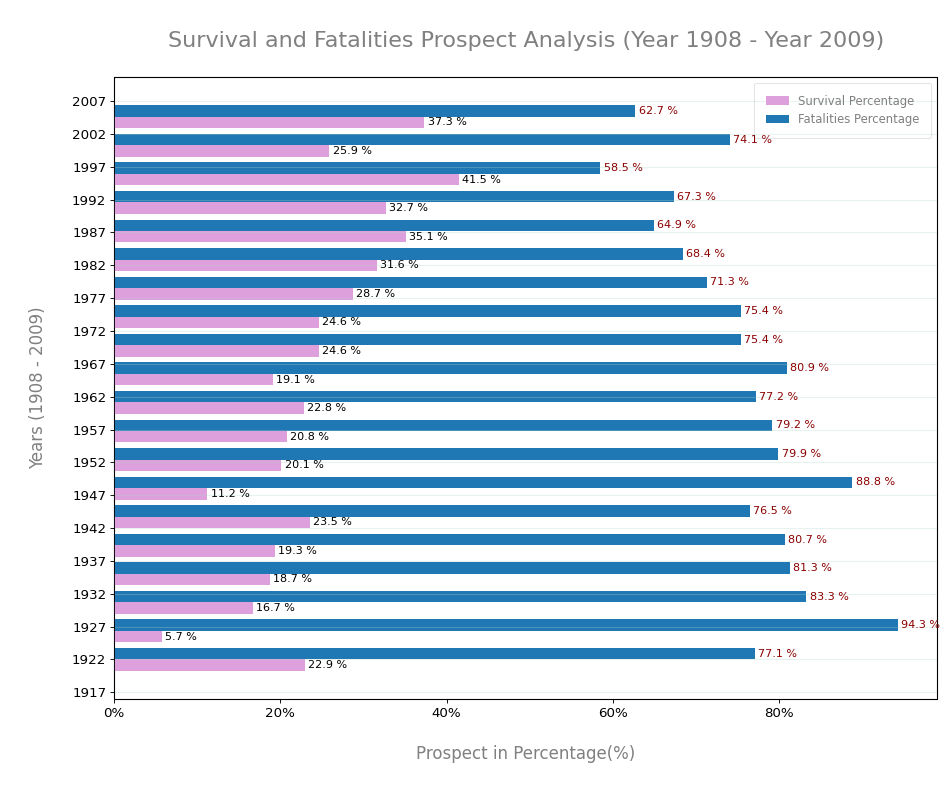

In [24]:
peopleSurvivedInAirCrashDataframe = ImputedValuesCrashesDataframe.copy()
peopleSurvivedInAirCrashDataframe['Survived'] = peopleSurvivedInAirCrashDataframe.Aboard - peopleSurvivedInAirCrashDataframe.Fatalities
peopleSurvivedInAirCrashDataframe['Year'] = pd.DatetimeIndex(peopleSurvivedInAirCrashDataframe['Date']).year
peopleSurvivedInAirCrashDataframe['Fatalities_Percentage']= peopleSurvivedInAirCrashDataframe.Fatalities/peopleSurvivedInAirCrashDataframe.Aboard
peopleSurvivedInAirCrashDataframe['Survival_Percentage']= peopleSurvivedInAirCrashDataframe.Survived/peopleSurvivedInAirCrashDataframe.Aboard

peopleSurvivedAndFatalitiesPercentage=peopleSurvivedInAirCrashDataframe.groupby('Year')[['Aboard','Fatalities', 'Survived']].sum()

Fatalities=peopleSurvivedAndFatalitiesPercentage['Fatalities'].tolist()
Survived=peopleSurvivedAndFatalitiesPercentage['Survived'].tolist()
Aboard = peopleSurvivedAndFatalitiesPercentage.Aboard.tolist()


Years = peopleSurvivedAndFatalitiesPercentage[0:98:5]

Aboard_Percentage=[]
Survived_Percentage=[]
for i in range(0,len(Survived),5):
    sumSurvived=np.array(Survived[i:i+4]).sum()
    Survived_Percentage.append(sumSurvived)
    sumAboard=np.array(Aboard[i:i+4]).sum()
    Aboard_Percentage.append(sumAboard)
    
Fatalities_Percentage=[]
for i in range(0,len(Fatalities),5):
    sumFatalities=np.array(Fatalities[i:i+4]).sum()
    Fatalities_Percentage.append(sumFatalities)
    
FatalitiesSurvivedPercentage= pd.DataFrame(Years,columns=[])
FatalitiesSurvivedPercentage['Survived'] = Survived_Percentage
FatalitiesSurvivedPercentage['Fatalities'] = Fatalities_Percentage
FatalitiesSurvivedPercentage['Aboard'] = Aboard_Percentage

FatalitiesSurvivedPercentage['Fatalities_Percentage']=((FatalitiesSurvivedPercentage.Fatalities/FatalitiesSurvivedPercentage.Aboard)*100).round(decimals = 1)
FatalitiesSurvivedPercentage['Survival_Percentage']= ((FatalitiesSurvivedPercentage.Survived/FatalitiesSurvivedPercentage.Aboard)*100).round(decimals = 1)

labels = FatalitiesSurvivedPercentage.index
men_means = FatalitiesSurvivedPercentage['Survival_Percentage']
women_means = FatalitiesSurvivedPercentage['Fatalities_Percentage']

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax =  plt.subplots(figsize = (12,10), dpi = 80)
rects1 = ax.barh(x - width/2, men_means, width, label='Survival Percentage', color = 'plum')
rects2 = ax.barh(x + width/2, women_means, width, label='Fatalities Percentage')

# Percent formatter
ax.xaxis.set_major_formatter(ticker.PercentFormatter())

ax.legend(prop={'size': 10.5}, loc='best', edgecolor='black', borderpad=1, framealpha=0.1, labelcolor='grey')

plt.title('\nSurvival and Fatalities Prospect Analysis (Year 1908 - Year 2009)\n', size=20, color='grey')
plt.ylabel('\nYears (1908 - 2009)\n', fontsize=15, color='grey')
ax.set_yticklabels(labels)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1.15))
plt.xlabel('\nProspect in Percentage(%)\n', fontsize=15, color='grey')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_facecolor((1, 1, 1))
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('1')

#plt.grid(visible=False, axis='both')
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.bar_label(rects1, padding=3, fmt='%g %%', label_type='edge' )
ax.bar_label(rects2, padding=3, fmt='%g %%', label_type='edge', color= '#8B0000' )
fig.tight_layout()

plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>         
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">  
    <li>The graph above shows the <span style="font-weight: bold; color:#122ecc;"> rate of fatalities</span> and <span style="font-weight: bold; color:#122ecc;">survivors</span> in <span style="font-weight: bold; color:#122ecc;"> air crashes</span> every year from<span style="font-weight: bold; color:#122ecc;"> 1908</span> to <span style="font-weight: bold; color:#122ecc;">2009</span>.</li>     
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/time-logo.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">&emsp;Analyses by Time</li>
</ul>

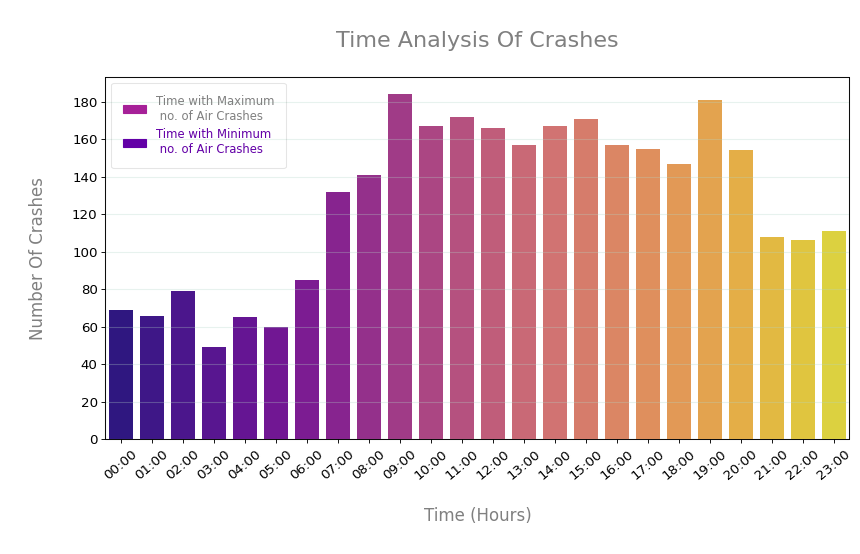

In [25]:
RemoveNANValuesDataFrame = ImputedValuesCrashesDataframe.copy()

# Remove NaN values of Operator from Air Crashes dataframe 
RemoveNANValues= RemoveNANValuesDataFrame['Time'].notna()
checkTimeDataFrame = RemoveNANValuesDataFrame[RemoveNANValues]

time= checkTimeDataFrame.Time.tolist()

hour=[]
for i in time:
    string=str(i)
    x=re.split(':',string)
    hour.append(x)
    
#hour[2][0]
checkHour= {'c':'00',
            'c14':'14',
            'c16':'16',
            '8':'08',
            '9':'09',
            '0943':'09',
            '12\'20':'12',
            '114':'11',
            '22\'08':'22',
            '1':'01',
            '18.40':'18',
            '2':'02'}
hours=[]
for i in range(len(hour)):
    for j in range(1):
        times=hour[i][j]
        if times in checkHour:
            times=checkHour.get(times)
            hours.append(times)
        else:
            hours.append(times)

TimebyHoursDataFrame = pd.DataFrame(checkTimeDataFrame.index, columns=['index'])
TimebyHoursDataFrame['Time(hours)']= hours

SortedTimebyHoursDataFrame=TimebyHoursDataFrame.sort_values(by=['Time(hours)'])
TimebyHourdf= SortedTimebyHoursDataFrame.groupby('Time(hours)')[['index']].count()

fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
cmap = plt.get_cmap('plasma', 12)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

def formatHour(hour):
      return hour + ':00'
x= list(map(formatHour , TimebyHourdf.index))
ax=sns.barplot(x=x, y=TimebyHourdf['index'].squeeze(), palette='plasma')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=20.0))

plt.title('\nTime Analysis Of Crashes\n', size=20, color='grey')
plt.xlabel('\nTime (Hours)\n', fontsize=15, color='grey')
plt.ylabel('\nNumber Of Crashes\n', fontsize=15, color='grey')
plt.xticks(fontsize=12, rotation=40)
plt.yticks(fontsize=12)
#ax.grid(visible=False)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

MA = mpatches.Patch(color=clrs[4], label='Time with Maximum\n no. of Air Crashes')
MI = mpatches.Patch(color=clrs[2], label='Time with Minimum\n no. of Air Crashes')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', edgecolor='black', borderpad=1, framealpha=0.1, labelcolor=['grey', clrs[2]]);

ax.set_facecolor((1, 1, 1))
ax.patch.set_edgecolor('grey')  
ax.patch.set_linewidth('1')


plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">  
    <li>1. Globally, the <span style="font-weight: bold; color:#122ecc;"> most air crashes</span> occurred around <span style="font-weight: bold; color:#122ecc;">9:00</span> in the <span style="font-weight: bold; color:#122ecc;"> morning</span>.</li>     
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;"> Nighttime 3:00</span> is the <span style="font-weight: bold; color:#122ecc;">least affected time duration</span> when air crashes occurred from the year<span style="font-weight: bold; color:#122ecc;"> 1908</span> to<span style="font-weight: bold; color:#122ecc;"> 2009</span>.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Operator-logo.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">&emsp;Analyses by Flight Operator</li>
</ul>

In [26]:
# Creating a new Dataframe for Military Air Crash

RemoveNANValuesDataFrame = ImputedValuesCrashesDataframe.copy()

# Remove NaN values of Operator from Air Crashes dataframe 
RemoveNANValues= RemoveNANValuesDataFrame['Operator'].notna()
checkOperatorDataFrame = RemoveNANValuesDataFrame[RemoveNANValues]

# Check Operator is Military
checkOperator=checkOperatorDataFrame['Operator'].str.contains('Military')

# Create a Military Dataframe
militaryAirCrashDataFrame = checkOperatorDataFrame[checkOperator]
militaryAirCrashDataFrame.head(5).style.background_gradient(cmap='icefire')

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0.000000,1908-09-17 00:00:00,17:18,"Fort Myer, Virginia",Military - U.S. Army,nan,Demonstration,Wright Flyer III,nan,1,2.000000,1.000000,0.000000,"During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history. One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft. Orville Wright suffered broken ribs, pelvis and a leg. Selfridge suffered a crushed skull and died a short time later."
1,1.000000,1912-07-12 00:00:00,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,nan,Test flight,Dirigible,nan,nan,5.000000,5.000000,0.000000,"First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight."
3,3.000000,1913-09-09 00:00:00,18:30,Over the North Sea,Military - German Navy,nan,nan,Zeppelin L-1 (airship),nan,nan,20.000000,14.000000,0.000000,The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants.
4,4.000000,1913-10-17 00:00:00,10:30,"Near Johannisthal, Germany",Military - German Navy,nan,nan,Zeppelin L-2 (airship),nan,nan,30.000000,30.000000,0.000000,"Hydrogen gas which was being vented was sucked into the forward engine and ignited causing the airship to explode and burn at 3,000 ft.."
5,5.000000,1915-03-05 00:00:00,01:00,"Tienen, Belgium",Military - German Navy,nan,nan,Zeppelin L-8 (airship),nan,nan,41.000000,21.000000,0.000000,Crashed into trees while attempting to land after being shot down by British and French aircraft.


In [27]:
# Creating a new Dataframe for Army Air Crash

RemoveNANValuesDataFrame = ImputedValuesCrashesDataframe.copy()

# Remove NaN values of Operator from Air Crashes dataframe 
RemoveNANValues= RemoveNANValuesDataFrame['Operator'].notna()
checkOperatorDataFrame = RemoveNANValuesDataFrame[RemoveNANValues]

# Check Operator is Army
checkOperator=checkOperatorDataFrame['Operator'].str.contains('Army')

# Create a Army Dataframe
ArmyAirCrashDataFrame = checkOperatorDataFrame[checkOperator]
ArmyAirCrashDataFrame.head(5).style.background_gradient(cmap='plasma')

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0.000000,1908-09-17 00:00:00,17:18,"Fort Myer, Virginia",Military - U.S. Army,nan,Demonstration,Wright Flyer III,nan,1,2.000000,1.000000,0.000000,"During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history. One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft. Orville Wright suffered broken ribs, pelvis and a leg. Selfridge suffered a crushed skull and died a short time later."
7,7.000000,1916-07-28 00:00:00,nan,"Near Jambol, Bulgeria",Military - German Army,nan,nan,Schutte-Lanz S-L-10 (airship),nan,nan,20.000000,20.000000,0.000000,"Crashed near the Black Sea, cause unknown."
10,10.000000,1916-11-21 00:00:00,nan,"Mainz, Germany",Military - German Army,nan,nan,Super Zeppelin (airship),nan,nan,28.000000,27.000000,0.000000,Crashed in a storm.
12,12.000000,1917-03-04 00:00:00,nan,"Near Gent, Belgium",Military - German Army,nan,nan,Airship,nan,nan,20.000000,20.000000,0.000000,Caught fire and crashed.
59,59.000000,1922-02-21 00:00:00,nan,"Near Norfolk, Virginia",Military - U.S. Army Air Service,nan,nan,Dirigible Roma (airship),nan,nan,45.000000,34.000000,0.000000,Crashed from a height of 500 ft. after experiencing control problems cause by malfunctioning controls.


In [28]:
# Creating a new Dataframe for Navy Air Crash

RemoveNANValuesDataFrame = ImputedValuesCrashesDataframe.copy()

# Remove NaN values of Operator from Air Crashes dataframe 
RemoveNANValues= RemoveNANValuesDataFrame['Operator'].notna()
checkOperatorDataFrame = RemoveNANValuesDataFrame[RemoveNANValues]

# Check Operator is Navy
checkOperator=checkOperatorDataFrame['Operator'].str.contains('Navy')

# Create a Navy Dataframe
NavyAirCrashDataFrame = checkOperatorDataFrame[checkOperator]
NavyAirCrashDataFrame.head(5).style.background_gradient(cmap='twilight_shifted_r')

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
1,1.000000,1912-07-12 00:00:00,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,nan,Test flight,Dirigible,nan,nan,5.000000,5.000000,0.000000,"First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight."
3,3.000000,1913-09-09 00:00:00,18:30,Over the North Sea,Military - German Navy,nan,nan,Zeppelin L-1 (airship),nan,nan,20.000000,14.000000,0.000000,The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants.
4,4.000000,1913-10-17 00:00:00,10:30,"Near Johannisthal, Germany",Military - German Navy,nan,nan,Zeppelin L-2 (airship),nan,nan,30.000000,30.000000,0.000000,"Hydrogen gas which was being vented was sucked into the forward engine and ignited causing the airship to explode and burn at 3,000 ft.."
5,5.000000,1915-03-05 00:00:00,01:00,"Tienen, Belgium",Military - German Navy,nan,nan,Zeppelin L-8 (airship),nan,nan,41.000000,21.000000,0.000000,Crashed into trees while attempting to land after being shot down by British and French aircraft.
6,6.000000,1915-09-03 00:00:00,15:20,"Off Cuxhaven, Germany",Military - German Navy,nan,nan,Zeppelin L-10 (airship),nan,nan,19.000000,19.000000,0.000000,"Exploded and burned near Neuwerk Island, when hydrogen gas, being vented, was ignited by lightning."


In [29]:
# Creating a new Dataframe for Air Force Air Crash

RemoveNANValuesDataFrame = ImputedValuesCrashesDataframe.copy()

# Remove NaN values of Operator from Air Crashes dataframe 
RemoveNANValues= RemoveNANValuesDataFrame['Operator'].notna()
checkOperatorDataFrame = RemoveNANValuesDataFrame[RemoveNANValues]

# Check Operator is Air Force
checkOperator=checkOperatorDataFrame['Operator'].str.contains('Air Force')

# Create a Air Force Dataframe
AirForceAirCrashDataFrame = checkOperatorDataFrame[checkOperator]
AirForceAirCrashDataFrame.head(5).style.background_gradient(cmap='YlOrBr')

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
49,49.000000,1921-04-06 00:00:00,nan,"Point Cook, Australia",Military - Royal Australian Air Force,nan,nan,nan,H3021,nan,2.000000,1.000000,0.000000,nan
176,176.000000,1929-04-21 00:00:00,nan,"San Diego, California",Maddux Airlines / Military - U.S.Army Air Force,nan,San Diego - Phoenix,Ford 5-AT-B Tri-Motor / B-PW-9D,NC9636 / 28-037,4-AT-010,6.000000,6.000000,0.000000,"A midair collision occurred with a US Air Force Boeing PW-9D at 2,000 ft. Five killed on the Tri-motor, one on the Boeing. Army pilot Lieutenant Howard Keefer, while flying above the airliner, was stunting and performed a steep banking turn downward, in an attempt to pass in front of the airliner. Instead, he misjudged the speed of the Maddux aircraft and his diving plane struck the cockpit of the Ford Tri-motor. He was found criminally negligent."
518,518.000000,1939-05-08 00:00:00,12:00,"Guayaquil, Ecuador",Military - Ecuadorian Air Force,nan,nan,Curtiss-Wright C-14 Osprey,nan,nan,1.000000,1.000000,22.000000,"While performing aerobatics, the aircraft lost control and crashed into numerous building near a college."
538,538.000000,1940-08-13 00:00:00,10:15,"Near Canberra, Australia",Military - Royal Australian Air Force,nan,Melbourne - Canberra,Lockheed Hudson A16-97,nan,nan,10.000000,10.000000,0.000000,"The plane was seen circling Canberra Aerodrome after which it headed west to make the final approach for landing. The aircraft momentarily disappeared behind one of the hills that surround the airport, then reappeared. There was the sound of engines being gunned, then the aircraft disappeared again. An explosion and sight of a large plume of black smoke followed. All on board the Hudson were killed including several high ranking Australian military leaders. A witness later said the aircraft appeared to drop its left wing and then dip its nose steeply, classisymptoms of a stall, too close to the ground for recovery."
558,558.000000,1941-08-10 00:00:00,20:35,"Arran, Scotland",Military -Royal Air Force,nan,nan,Consolidated LB-30A Liberator,AM261,nan,22.000000,22.000000,0.000000,"Crashed into a mountain ridge in rain, low visibility and overcast conditions. Navigational error."


In [30]:
# Creating a new Dataframe for Private Airplane Crash
RemoveNANValuesDataFrame = ImputedValuesCrashesDataframe.copy()

# Remove NaN values of Operator from Air Crashes dataframe 
RemoveNANValues= RemoveNANValuesDataFrame['Operator'].notna()
checkOperatorDataFrame = RemoveNANValuesDataFrame[RemoveNANValues]

# Check Operator is Private
checkOperator=checkOperatorDataFrame['Operator'].str.contains('Private')

# Create a Private Airplane Crash Dataframe
PrivateAirCrashDataFrame = checkOperatorDataFrame[checkOperator]
PrivateAirCrashDataFrame.head(5).style.background_gradient(cmap='PuBu')

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2,2.000000,1913-08-06 00:00:00,nan,"Victoria, British Columbia, Canada",Private,-,nan,Curtiss seaplane,nan,nan,1.000000,1.000000,0.000000,"The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed."
367,367.000000,1935-08-15 00:00:00,20:18,"Walakpa, near Point Barrow, Alaska",Private,nan,nan,Lockheed Orion 9E Explorer float plane,NR12283,195,2.000000,2.000000,0.000000,"Dense fog caused the pilot to make a forced landing about 15 miles south of Point Barrow. After some mechanical repairs, the plane took off, rose to about 50 feet and then crashed into shallow water. Loss of control of the aircraft at a low altitude after sudden engine failure due to the extreme nose-heaviness of the aircraft. Adventurer, Wiley Post, 37, and humorist, Will Rogers, 56, killed. Most experts believe that a combination of miscalculations in the design and operation of the heavily customized aircraft resulted in the uncontrollable spin that occurred right after takeoff."
435,435.000000,1937-07-02 00:00:00,nan,"Off Lae, New Guinea",Private - Purdue Reasearch Foundation,nan,Lae - Howland Island,Lockheed 10E Electra,NR16020,1055,2.000000,2.000000,0.000000,"The plane disappeared while en route from Lae to Howland Island. The aircraft had to be flown higher than expected due to storms which used extra fuel. In addition, strong head winds were encountered. The aircraft most likely ran out of fuel and ditched into the ocean 50 to 100 miles northwest of Howland Island. Amelia Earhart, 40, and navigator Fred Noonan, killed."
607,607.000000,1943-02-18 00:00:00,12:30,"Seattle, Washington",Private - Boeing Aircraft Company,nan,Test flight,Boeing XB-29,41-3,nan,10.000000,10.000000,20.000000,"Lost altitude, struck power lines and crashed into a packing house after encountering an engine fire on a test flight."
1214,1214.000000,1952-09-06 00:00:00,15:40,"Near Farnsborough, England",Private - de Havilland Aircraft,nan,nan,de Havilland 110,WG235,nan,1.000000,1.000000,52.000000,"One of two engines of the aircraft fell into a crowd at a performance at the Farnborough air show. The aircraft crashed to the ground 1.5 miles from the grandstands killing the Chief test pilot of de Havilland Aircraft Corporation, John Derry and an observer, Tony Richards. In addition, fifty two people on the ground were killed and over 60 injured. The cause was a structural design fault in the D shaped leading edge section of the wing. When Derry pulled a high G turn, the wing buckled."


In [31]:
# Creating a new Dataframe for Mail Service Airplane Crash
RemoveNANValuesDataFrame = ImputedValuesCrashesDataframe.copy()

# Remove NaN values of Operator from Air Crashes dataframe 
RemoveNANValues= RemoveNANValuesDataFrame['Operator'].notna()
checkOperatorDataFrame = RemoveNANValuesDataFrame[RemoveNANValues]

# Check Operator is Private
checkOperator=checkOperatorDataFrame['Operator'].str.contains('Mail Service')

# Create a Mail Service Airplane Crash Dataframe
MailServiceAirCrashDataFrame = checkOperatorDataFrame[checkOperator]
MailServiceAirCrashDataFrame.head(5).style.background_gradient(cmap='gist_yarg_r')

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
21,21.000000,1918-12-16 00:00:00,nan,"Elizabeth, New Jersey",US Aerial Mail Service,nan,nan,De Havilland DH-4,97,nan,1.000000,1.000000,0.000000,nan
22,22.000000,1919-05-25 00:00:00,nan,"Cleveland, Ohio",US Aerial Mail Service,nan,nan,De Havilland DH-4,61,nan,1.000000,1.000000,0.000000,Caught fire in midair. The pilot leaped from the plane to his death as the plane began to go into a dive.
23,23.000000,1919-07-19 00:00:00,nan,"Dix Run, Pennsylvania",US Aerial Mail Service,nan,nan,De Havilland DH-4,82,nan,1.000000,1.000000,0.000000,nan
25,25.000000,1919-10-14 00:00:00,nan,"Cantonsville, Maryland",US Aerial Mail Service,nan,nan,Curtiss R-4LM,32,nan,1.000000,1.000000,0.000000,nan
27,27.000000,1919-10-30 00:00:00,nan,"Long Valley, New Jersey",US Aerial Mail Service,nan,nan,De Havilland DH.4,77,nan,1.000000,1.000000,0.000000,nan


In [32]:
PassengerAirCrashDataFrame = ImputedValuesCrashesDataframe.copy()

#Remove PrivateAirCrashDataFrame from militaryAirCrashDataFrame
cond = PassengerAirCrashDataFrame['Operator'].isin(militaryAirCrashDataFrame['Operator'])
PassengerAirCrashDataFrame.drop(PassengerAirCrashDataFrame[cond].index, inplace = True)

#Remove PrivateAirCrashDataFrame from PassengerAirCrashDataFrame
cond = PassengerAirCrashDataFrame['Operator'].isin(PrivateAirCrashDataFrame['Operator'])
PassengerAirCrashDataFrame.drop(PassengerAirCrashDataFrame[cond].index, inplace = True)

#Remove PrivateAirCrashDataFrame from PassengerAirCrashDataFrame
cond = PassengerAirCrashDataFrame['Operator'].isin(MailServiceAirCrashDataFrame['Operator'])
PassengerAirCrashDataFrame.drop(PassengerAirCrashDataFrame[cond].index, inplace = True)

PassengerAirCrashDataFrame.head(5).style.background_gradient(cmap='prism')

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
24,24.000000,1919-10-02 00:00:00,nan,"Newcastle, England",Aircraft Transport and Travel,nan,nan,De Havilland DH-4,nan,nan,1.000000,1.000000,0.000000,nan
26,26.000000,1919-10-20 00:00:00,nan,English Channel,Aircraft Transport and Travel,nan,nan,De Havilland DH-4,G-EAHG,nan,27.554518,20.068303,1.608845,nan
34,34.000000,1920-08-16 00:00:00,nan,"Bedford, England",By Air,nan,nan,Armstrong-Whitworth F-K-8,G-EALW,nan,1.000000,1.000000,0.000000,nan
39,39.000000,1920-10-02 00:00:00,nan,"Off Port Vendres, France",Latecoere Airlines,nan,nan,Salmson 2-A-2,F-ALAI,31,2.000000,2.000000,0.000000,nan
40,40.000000,1920-10-05 00:00:00,nan,"Valencia, Spain",Latecoere Airlines,nan,nan,Breguet 14,F-ALTA,20,2.000000,2.000000,0.000000,Crashed while landing.


In [33]:
# Flight Operators DataFrame
countPassenger= PassengerAirCrashDataFrame['Operator'].count()
countMailService= MailServiceAirCrashDataFrame['Operator'].count()
countPrivate= PrivateAirCrashDataFrame['Operator'].count()
countMilitary= militaryAirCrashDataFrame['Operator'].count()

data = ['Passenger', 'Mail Service' , 'Private' , 'Military']
       

OperatorCountdf = pd.DataFrame(data, columns=['Operator'])
count= [countPassenger, countMailService, countPrivate, countMilitary]
OperatorCountdf['Count'] = count
countsum= OperatorCountdf.Count.sum()
Percent = OperatorCountdf.Count / countsum
OperatorCountdf['Percent'] = Percent

In [34]:
#Military Operator Dataframe
countAirForce= AirForceAirCrashDataFrame['Operator'].count()
countNavy= NavyAirCrashDataFrame['Operator'].count()
countArmy= ArmyAirCrashDataFrame['Operator'].count()

data = ['Air Force', 'Navy','Army']
MilitaryOperatorCountdf = pd.DataFrame(data, columns=['Military_Operator'])
count= [countAirForce, countNavy, countArmy]
MilitaryOperatorCountdf['Count'] = count
countsum= MilitaryOperatorCountdf.Count.sum()
Percent =  MilitaryOperatorCountdf.Count / countsum
MilitaryOperatorCountdf['Percent'] = Percent

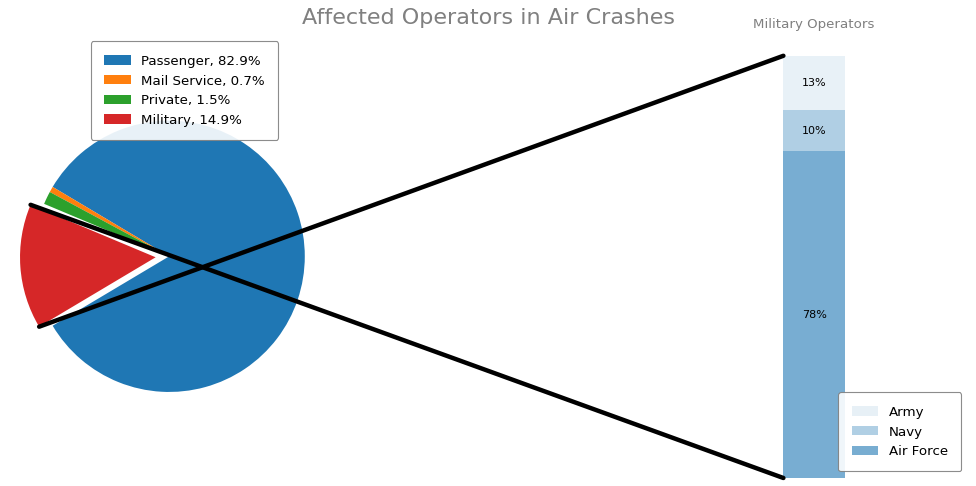

In [35]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6),  dpi = 80)
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = OperatorCountdf['Percent']
labels = OperatorCountdf['Operator']

explode = [0, 0, 0, 0.1]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios , startangle=angle, explode=explode)

label = [f'{l}, {s:0.1f}%' for l, s in zip(labels, overall_ratios*100)]
ax1.legend(bbox_to_anchor=(0.9, 1), loc='upper right', labels=label, prop={'size': 12}, edgecolor='grey', borderpad=1,  framealpha=0.9)

#ax1.legend(labels= labels , loc = 'lower center')
ax1.axis('equal')


# bar chart parameters
age_ratios = MilitaryOperatorCountdf['Percent']
age_labels = MilitaryOperatorCountdf['Military_Operator']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Military Operators', color='grey')
ax2.legend(loc='lower right', prop={'size': 12}, edgecolor='grey', borderpad=1,  framealpha=0.9)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[3].theta1, wedges[3].theta2
center, r = wedges[3].center, wedges[3].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

fig.suptitle('Affected Operators in Air Crashes', fontsize=20 , color='grey')
fig.tight_layout(pad=0)
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>      
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>1. Out of all Air Operators,<span style="font-weight: bold; color:#122ecc;"> Passenger Airlines</span> are the <span style="font-weight: bold; color:#122ecc;">most affected ones</span>, with <span style="font-weight: bold; color:#122ecc;"> 89.2%</span>.</li>     
    <br>          
    <li>2. <span style="font-weight: bold; color:#122ecc;"> Military Operators</span> are the<span style="font-weight: bold; color:#122ecc;"> second most</span> affected ones. Among them, <span style="font-weight: bold; color:#122ecc;">Air Force</span> has experienced<span style="font-weight: bold; color:#122ecc;"> more crashes</span> , around <span style="font-weight: bold; color:#122ecc;"> 78%</span>.</li>
    <br>
</ul>
</div>

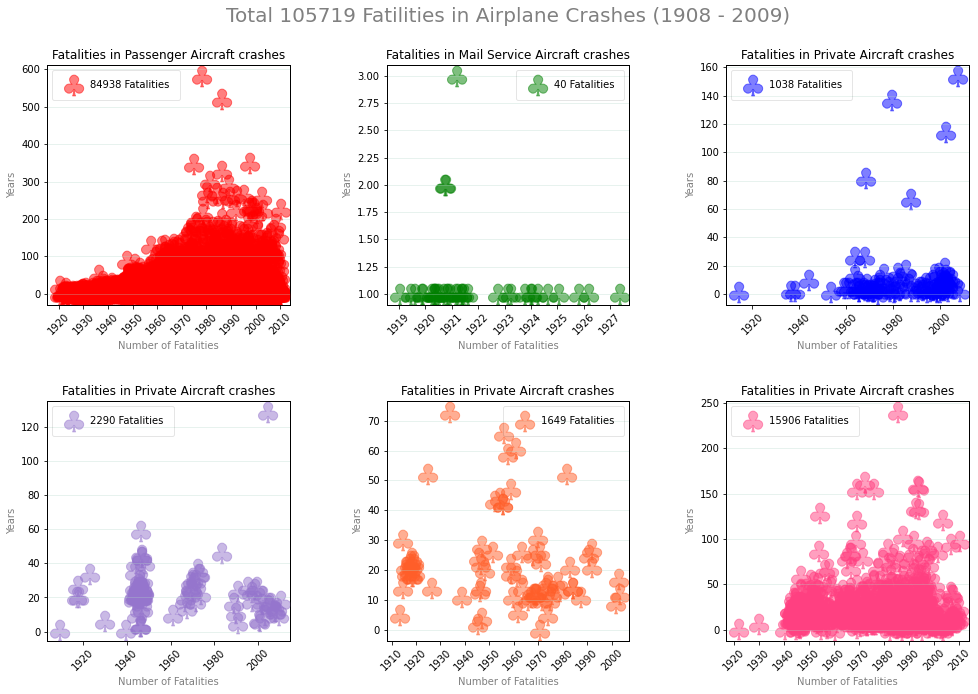

In [36]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3 , figsize = (16,10))


def Passenger():
    y = PassengerAirCrashDataFrame['Fatalities']
    x = PassengerAirCrashDataFrame['Date']
    label1= ( str(int(PassengerAirCrashDataFrame['Fatalities'].sum())) + " Fatalities")
    ax1.scatter(x, y, s=500,  c="r", alpha=0.5, marker=r'$\clubsuit$', label=label1)
    ax1.legend(loc='best', prop={'size': 10},  edgecolor='black', borderpad=1,  framealpha=0.1)
    ax1.set_title("Fatalities in Passenger Aircraft crashes", size=12, color='black')
    ax1.set_xlabel('Number of Fatalities', color='grey')
    ax1.set_ylabel('Years',  color='grey')
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    ax1.set_facecolor((1, 1, 1))
    ax1.patch.set_edgecolor('black')  
    ax1.patch.set_linewidth('1')
    #ax1.grid(visible=False)
    ax1.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

def MailService():   
    y1 = MailServiceAirCrashDataFrame['Fatalities']
    x1 = MailServiceAirCrashDataFrame['Date']
    label2= ( str(int( MailServiceAirCrashDataFrame['Fatalities'].sum())) + " Fatalities")
    ax2.scatter(x1, y1, s=500,  c="g", alpha=0.5, marker=r'$\clubsuit$', label=label2)
    ax2.legend(loc='best', prop={'size': 10},  edgecolor='black', borderpad=1,  framealpha=0.1)
    ax2.set_title("Fatalities in Mail Service Aircraft crashes", size=12, color='black')
    ax2.set_xlabel('Number of Fatalities', color='grey')
    ax2.set_ylabel('Years',  color='grey')
    for tick in ax2.get_xticklabels():
        tick.set_rotation(45)
    ax2.set_facecolor((1, 1, 1))
    ax2.patch.set_edgecolor('black')  
    ax2.patch.set_linewidth('1')
    #ax2.grid(visible=False)
    ax2.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
  
def Private():
    y2 = PrivateAirCrashDataFrame['Fatalities']
    x2 = PrivateAirCrashDataFrame['Date']
    label3= ( str(int( PrivateAirCrashDataFrame['Fatalities'].sum())) + " Fatalities")
    ax3.scatter(x2, y2, s=500,  c="b", alpha=0.5, marker=r'$\clubsuit$', label=label3)
    ax3.legend(loc='best', prop={'size': 10}, edgecolor='black', borderpad=1,  framealpha=0.1)
    ax3.set_title("Fatalities in Private Aircraft crashes", size=12, color='black')
    ax3.set_xlabel('Number of Fatalities', color='grey')
    ax3.set_ylabel('Years',  color='grey')
    for tick in ax3.get_xticklabels():
        tick.set_rotation(45)
    ax3.set_facecolor((1, 1, 1))
    ax3.patch.set_edgecolor('black')  
    ax3.patch.set_linewidth('1')
    #ax3.grid(visible=False)
    ax3.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
    
def Army():
    y3 = ArmyAirCrashDataFrame['Fatalities']
    x3 = ArmyAirCrashDataFrame['Date']
    label4= (str(int( ArmyAirCrashDataFrame['Fatalities'].sum())) + " Fatalities")
    ax4.scatter(x3, y3, s=500,  c='#9575CD', alpha=0.5, marker=r'$\clubsuit$', label=label4)
    ax4.legend(loc='best', prop={'size': 10}, edgecolor='black', borderpad=1,  framealpha=0.1)
    ax4.set_title("Fatalities in Private Aircraft crashes", size=12, color='black')
    ax4.set_xlabel('Number of Fatalities', color='grey')
    ax4.set_ylabel('Years',  color='grey')
    for tick in ax4.get_xticklabels():
        tick.set_rotation(45)
    ax4.set_facecolor((1, 1, 1))
    ax4.patch.set_edgecolor('black')  
    ax4.patch.set_linewidth('1')
    #ax4.grid(visible=False)
    ax4.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

def Navy():
    y4 = NavyAirCrashDataFrame['Fatalities']
    x4 = NavyAirCrashDataFrame['Date']
    label5= (str(int( NavyAirCrashDataFrame['Fatalities'].sum())) + " Fatalities")
    ax5.scatter(x4, y4, s=500,  c='#ff5e29', alpha=0.5, marker=r'$\clubsuit$', label=label5)
    ax5.legend(loc='best', prop={'size': 10},  edgecolor='black', borderpad=1,  framealpha=0.1)
    ax5.set_title("Fatalities in Private Aircraft crashes", size=12, color='black')
    ax5.set_xlabel('Number of Fatalities', color='grey')
    ax5.set_ylabel('Years',  color='grey')
    for tick in ax5.get_xticklabels():
        tick.set_rotation(45)
    ax5.set_facecolor((1, 1, 1))
    ax5.patch.set_edgecolor('black')  
    ax5.patch.set_linewidth('1')
    #ax5.grid(visible=False)
    ax5.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
    
def AirForce():
    y5 = AirForceAirCrashDataFrame['Fatalities']
    x5 = AirForceAirCrashDataFrame['Date']
    label6= ( str(int( AirForceAirCrashDataFrame['Fatalities'].sum())) + " Fatalities")
    ax6.scatter(x5, y5, s=500,  c='#FF4081', alpha=0.5, marker=r'$\clubsuit$', label=label6)
    ax6.legend(loc='best', prop={'size': 10}, edgecolor='black', borderpad=1,  framealpha=0.1)
    ax6.set_title("Fatalities in Private Aircraft crashes", size=12, color='black')
    ax6.set_xlabel('Number of Fatalities', color='grey')
    ax6.set_ylabel('Years',  color='grey')
    for tick in ax6.get_xticklabels():
        tick.set_rotation(45)
    ax6.set_facecolor((1, 1, 1))
    ax6.patch.set_edgecolor('black')  
    ax6.patch.set_linewidth('1')
    #ax6.grid(visible=False)
    ax6.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

title= "Total "+str(int(ImputedValuesCrashesDataframe.Fatalities.sum())) + " Fatilities in Airplane Crashes (1908 - 2009)"
fig.suptitle(title, fontsize=20 , color='grey')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


Passenger()
MailService()
Private()
Army()
Navy()
AirForce()

plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>       
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>With the <span style="font-weight: bold; color:#122ecc;"> highest fatality rate</span> the graphs clearly show that<span style="font-weight: bold; color:#122ecc;"> Passenger Airlines</span> are the <span style="font-weight: bold; color:#122ecc;">most affected Air Operators</span>, almost every year.</li>     
    <br>          
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/allinsight-logo.png" align="left" hspace="0px" vspace="10px" width="80" height="80"></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">&emsp;All Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>1. The<span style="font-weight: bold; color:#122ecc;"> Map </span>summarizes information about each country where air crashes occurred, such as <span style="font-weight: bold; color:#122ecc;">Country's name</span>, <span style="font-weight: bold; color:#122ecc;">Continent</span>, <span style="font-weight: bold; color:#122ecc;">Year</span>, <span style="font-weight: bold; color:#122ecc;">Time</span>, <span style="font-weight: bold; color:#122ecc;">Air craft</span>, <span style="font-weight: bold; color:#122ecc;">Air Operator</span>, <span style="font-weight: bold; color:#122ecc;">Number of Crashes </span>and <span style="font-weight: bold; color:#122ecc;">Fatalities due to Air Crash</span>.</li>
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;">Canada </span>has suffered <span style="font-weight: bold; color:#122ecc;">92 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest</span> in the world.</li>
    <br>
    <li>3. <span style="font-weight: bold; color:#122ecc;"> Colombia </span>has suffered <span style="font-weight: bold; color:#122ecc;">86 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>4. In <span style="font-weight: bold; color:#122ecc;">Slovenia</span>,
        <span style="font-weight: bold; color:#122ecc;">Lebanon</span>,
 <span style="font-weight: bold; color:#122ecc;">Albania</span>,
 <span style="font-weight: bold; color:#122ecc;">Tajikistan</span>,
<span style="font-weight: bold; color:#122ecc;">Belize</span>,
 <span style="font-weight: bold; color:#122ecc;">Botswana</span>,
 <span style="font-weight: bold; color:#122ecc;">Israel</span>,
<span style="font-weight: bold; color:#122ecc;">Ghana</span>,
<span style="font-weight: bold; color:#122ecc;">Kyrgyzstan</span>,
<span style="font-weight: bold; color:#122ecc;">Bangladeshr</span>,
 <span style="font-weight: bold; color:#122ecc;">Croatia</span>,
 <span style="font-weight: bold; color:#122ecc;">Yemen</span>
 <span style="font-weight: bold; color:#122ecc;">Mali</span>,
 <span style="font-weight: bold; color:#122ecc;">Central African Rep.</span>,
 <span style="font-weight: bold; color:#122ecc;">Luxembourg</span>,
 <span style="font-weight: bold; color:#122ecc;">Qatar</span>,
 <span style="font-weight: bold; color:#122ecc;">Czechia</span>,
 <span style="font-weight: bold; color:#122ecc;">Suriname</span>,
 <span style="font-weight: bold; color:#122ecc;">Benin</span>,
 <span style="font-weight: bold; color:#122ecc;">Tunisia</span>,
 <span style="font-weight: bold; color:#122ecc;">Belarus</span>,
 <span style="font-weight: bold; color:#122ecc;">Bulgaria</span>,
 <span style="font-weight: bold; color:#122ecc;">Eritrea</span> and
 <span style="font-weight: bold; color:#122ecc;">Malawi</span>, there have been only <span style="font-weight: bold; color:#122ecc;">one air crash </span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span> .</li>
    <br>
    <li>5. <span style="font-weight: bold; color:#122ecc;">India </span>has suffered <span style="font-weight: bold; color:#122ecc;">2456 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">61 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest rate</span> in the world.</li>
    <br>
    <li>6. <span style="font-weight: bold; color:#122ecc;"> Colombia </span>has suffered <span style="font-weight: bold; color:#122ecc;">2091 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">86 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>7. <span style="font-weight: bold; color:#122ecc;"> Czechia</span> and <span style="font-weight: bold; color:#122ecc;">Qatar </span>has the <span style="font-weight: bold; color:#122ecc;">lowest number of fatalities</span> due to air crashes, with <span style="font-weight: bold; color:#122ecc;">two fatalities</span> in a<span style="font-weight: bold; color:#122ecc;"> single crashes </span>.</li>
    <br>
    <li>8. <span style="font-weight: bold; color:#122ecc;">Asia </span>has suffered <span style="font-weight: bold; color:#122ecc;">490 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest</span> in the world.</li>
    <br>
    <li>9. <span style="font-weight: bold; color:#122ecc;"> Europe </span>has suffered <span style="font-weight: bold; color:#122ecc;">435 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>10. In <span style="font-weight: bold; color:#122ecc;">Oceania</span>, there are <span style="font-weight: bold; color:#122ecc;">75 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, the <span style="font-weight: bold; color:#122ecc;">lowest number</span> in the world.</li>
    <br> 
    <li>11. <span style="font-weight: bold; color:#122ecc;">Asia </span>has suffered <span style="font-weight: bold; color:#122ecc;">19751 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">490 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest rate</span> in the world.</li>
    <br>
    <li>12. <span style="font-weight: bold; color:#122ecc;"> Europe </span>has suffered <span style="font-weight: bold; color:#122ecc;">15064 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">435 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>13. <span style="font-weight: bold; color:#122ecc;"> Oceania </span>has the <span style="font-weight: bold; color:#122ecc;">lowest number of fatalities</span> due to air crashes, with <span style="font-weight: bold; color:#122ecc;">1230 fatalities</span> in<span style="font-weight: bold; color:#122ecc;"> 75 air crashes</span>.</li>
    <br>
    <li>14. The <span style="font-weight: bold; color:#122ecc;"> maximum number of air crashes</span> is <span style="font-weight: bold; color:#122ecc;"> 104</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1972</span> between 1908 and 2009.</li>
    <br>
    <li>15. <span style="font-weight: bold; color:#122ecc;"> 1912 </span>and <span style="font-weight: bold; color:#122ecc;">1908</span> had the  <span style="font-weight: bold; color:#122ecc;">fewest air crashes</span>, only<span style="font-weight: bold; color:#122ecc;"> one </span>between 1908 to 2009.</li>
    <br>
     <li>16. The <span style="font-weight: bold; color:#122ecc;"> maximum number of fatalities</span> is <span style="font-weight: bold; color:#122ecc;">2937</span> in <span style="font-weight: bold; color:#122ecc;">104 air crashes</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1972</span> between 1908 and 2009.</li>
    <br>
    <li>17. The <span style="font-weight: bold; color:#122ecc;"> minimum number of fatalities</span> is <span style="font-weight: bold; color:#122ecc;">1</span> in a<span style="font-weight: bold; color:#122ecc;">single air crash</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1908</span> between 1908 and 2009.</li>
    <br>
    <li>18. The graph shows the <span style="font-weight: bold; color:#122ecc;"> rate of fatalities</span> and <span style="font-weight: bold; color:#122ecc;">survivors</span> in <span style="font-weight: bold; color:#122ecc;"> air crashes</span> every year from<span style="font-weight: bold; color:#122ecc;"> 1908</span> to <span style="font-weight: bold; color:#122ecc;">2009</span>.</li>     
    <br>
     <li>19. Globally, the <span style="font-weight: bold; color:#122ecc;"> most air crashes</span> occurred around <span style="font-weight: bold; color:#122ecc;">9:00</span> in the <span style="font-weight: bold; color:#122ecc;"> morning</span>.</li>     
    <br>
    <li>20. <span style="font-weight: bold; color:#122ecc;"> Nighttime 3:00</span> is the <span style="font-weight: bold; color:#122ecc;">least affected time duration</span> when air crashes occurred from the year<span style="font-weight: bold; color:#122ecc;"> 1908</span> to<span style="font-weight: bold; color:#122ecc;"> 2009</span>.</li>
    <br>
     <li>21. Out of all Air Operators,<span style="font-weight: bold; color:#122ecc;"> Passenger Airlines</span> are the <span style="font-weight: bold; color:#122ecc;">most affected ones</span>, with <span style="font-weight: bold; color:#122ecc;"> 89.2%</span>.</li>     
    <br>          
    <li>22. <span style="font-weight: bold; color:#122ecc;"> Military Operators</span> are the<span style="font-weight: bold; color:#122ecc;"> second most</span> affected ones. Among them, <span style="font-weight: bold; color:#122ecc;">Air Force</span> has experienced<span style="font-weight: bold; color:#122ecc;"> more crashes</span> , around <span style="font-weight: bold; color:#122ecc;"> 78%</span>.</li>
    <br>
    <li>23. With the <span style="font-weight: bold; color:#122ecc;"> highest fatality rate</span> the graphs clearly show that<span style="font-weight: bold; color:#122ecc;"> Passenger Airlines</span> are the <span style="font-weight: bold; color:#122ecc;">most affected Air Operators</span>, almost every year.</li>     
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/refrences-logo.png" align="left" hspace="0px" vspace="10px" width="80" height="80"></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">&emsp;Refrences:</li>
</ul>      

<div class="alert alert-warning" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>1. <span style="font-weight: bold; color:#122ecc;"> https://matplotlib.org/3.1.1/gallery/index.html</li>     
    <br>          
    <li>2. <span style="font-weight: bold; color:#122ecc;"> https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/</li>     
    <br>
    <li>3. <span style="font-weight: bold; color:#122ecc;">https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html#Hue</li>     
    <br> 
    <li>4. <span style="font-weight: bold; color:#122ecc;">https://www.pngegg.com/</li>     
    <br>   
</ul>
</div>

 <img alt="Insight logo" src="https://mir-s3-cdn-cf.behance.net/project_modules/1400_opt_1/0c795874333139.5c3e657b811ff.gif" align="left" hspace="0px" vspace="0px" width=100% height=0 >
 
